In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import numpy as np

In [10]:
#load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

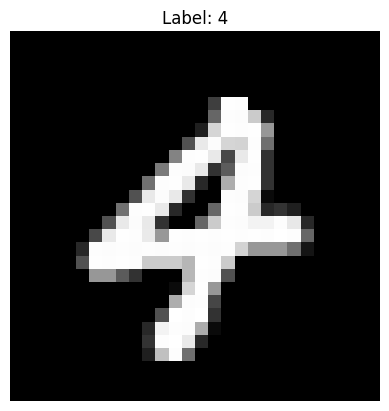

In [11]:
# Chọn một ảnh bất kỳ từ tập huấn luyện
index = np.random.randint(0, len(X_train))  # Chọn một chỉ số ngẫu nhiên
image = X_train[index]
label = y_train[index]

# Hiển thị ảnh
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

### Trích xuất đặc trưng

In [12]:
# Tiền xử lý dữ liệu
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0

# Chuyển nhãn thành one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Xây dựng mô hình
model = keras.Sequential([
    layers.Dense(200, input_shape=(784,), activation="relu"),  # Lớp ẩn với 200 neuron & ReLU
    layers.Dense(10, activation="softmax")  # Lớp đầu ra (10 neuron, softmax)
])

# Compile mô hình
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

C:\Users\hung0\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8886 - loss: 0.3971 - val_accuracy: 0.9618 - val_loss: 0.1255
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1051 - val_accuracy: 0.9752 - val_loss: 0.0807
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0638 - val_accuracy: 0.9779 - val_loss: 0.0732
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0452 - val_accuracy: 0.9784 - val_loss: 0.0667
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9740 - val_loss: 0.0857
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0264 - val_accuracy: 0.9785 - val_loss: 0.0677
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9798 - val_loss: 0.0710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0155 - 

In [13]:
# Hiển thị kiến trúc mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,032 (1.82 MB)

 Trainable params: 159,010 (621.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,022 (1.21 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


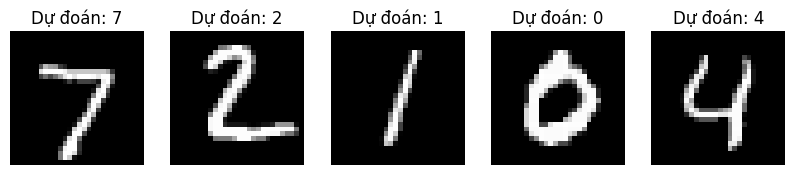

In [15]:
import matplotlib.pyplot as plt

# Dự đoán trên tập test
predictions = model.predict(X_test)

# Hiển thị một số ảnh với dự đoán của mô hình
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Dự đoán: {np.argmax(predictions[i])}")
    plt.axis("off")

plt.show()
